In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('new_file.csv')

In [2]:
data

,Reactions,Unnamed: 1,cardiac,BAT,kidney,brain,liver,SKM,Spleen
0,EX_2hb_e: 2hb_e <=>,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
1,EX_ac_e: ac_e <=>,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
2,EX_acac_e: acac_e <=>,NaN,0,-4.655125,-0.597207,0.000000,-9.99200722162641E-15,0.00000,-1.66163141993958
3,EX_akg_e: akg_e <=>,NaN,-15.5313351499687,-13.250000,-15.292553,-13.947368,-7.26902173913043,-10.07708,-14.5015105740181
4,EX_ala_B_e: ala_B_e <=>,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
...,...,...,...,...,...,...,...,...,...
556,ASPCT: asp_L_c + cbp_c <=> cbasp_c + h_c + pi_c,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
557,DHORTS: dhor_S_c + h2o_c <=> cbasp_c + h_c,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
558,DHORD9: dhor_S_c + q10_m --> orot_c + q10h2_m,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0
559,DM_orot_c: orot_c -->,NaN,0,0.000000,0.000000,0.000000,0,0.00000,0


In [3]:
data.head()
data.drop(['Unnamed: 1'],axis=1,inplace=True)

In [4]:
data.head()

ids=data["Reactions"]
x_data=data[["cardiac", "BAT", "kidney", "brain", "liver", "SKM", "Spleen"]]

In [5]:
x_data.dropna(inplace=True)

/tmp/ipykernel_270884/988199965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data.dropna(inplace=True)


In [6]:
x_numpy=x_data.to_numpy()   #convert to numpy array
x_numpy=x_numpy.astype(float)

In [7]:

greater_zero =x_numpy[x_numpy.sum(axis=1)>0]
greater_zero.T.shape
new_df=pd.DataFrame.from_dict(greater_zero)
new_df.columns=["cardiac", "BAT", "kidney", "brain", "liver", "SKM", "Spleen"]
sample_colors = np.random.rand(len(new_df.T))

column_names = new_df.T.columns



In [9]:
# import necessary packages 
import numpy as np 
from sklearn import preprocessing as p 

min_max_scaler = p.MinMaxScaler() 
normalizedData = min_max_scaler.fit_transform(greater_zero) 

# normalized data using MinMaxScaler 
print(normalizedData) 


[[0.10892798 0.36905504 0.23684007 0.15306441 0.28983477 0.41834042
  0.28968168]
 [0.71898769 0.40761813 1.         1.         0.79465894 1.
  1.        ]
 [0.19722325 0.77627946 0.28032125 0.06322157 0.22567261 0.34247668
  0.88569691]
 [0.09135244 0.37346225 0.08465595 0.07942264 0.10176302 0.19173936
  0.65145107]
 [0.09135244 0.30761963 0.18901078 0.09783309 0.13640782 0.28533512
  0.44396569]
 [0.09135244 0.37346225 0.78905106 0.35189718 0.91308475 0.19173936
  0.65145107]
 [0.58899358 0.         0.71937681 0.90562786 0.67057118 0.8489615
  0.37722431]
 [0.09135244 0.40880845 0.07812072 0.03523758 0.10176302 0.19173936
  0.3482032 ]
 [0.41017615 0.48694792 0.12378901 0.19877748 0.1957989  0.56165364
  0.28968168]
 [0.16145342 0.37346225 0.34989114 0.44394938 0.10176302 0.25274734
  0.32160251]
 [0.10892798 0.4340614  0.07161159 0.         0.00295607 0.38347872
  0.28968168]
 [0.09135244 0.37346225 0.07161159 0.03523758 0.10176302 0.19173936
  0.28968168]
 [0.09135244 0.3774269  0

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
# This produces a feature matrix of token counts, similar to what
# CountVectorizer would produce on text.
lda = LatentDirichletAllocation(n_components=2,
    random_state=0)

x=lda.fit_transform(normalizedData.T)

x=lda.fit_transform(normalizedData.T)

list_topics=[]
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-20-1:-1]  # Get indices of the top 10 words
    top_words = [ids[i] for i in top_words_idx]
    list_topics.append(list(top_words))
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: EX_ac_e: ac_e <=> , EX_co2_e: co2_e <=> , EX_chol_e: chol_e <=> , NDPK1: atp_c + gdp_c <=> adp_c + gtp_c, PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c, EX_gly_e: gly_e <=> , EX_arg_L_e: arg_L_e <=> , EX_ala_L_e: ala_L_e <=> , ADK1: amp_c + atp_c <=> 2.0 adp_c, SUCOAS1m: coa_m + gtp_m + succ_m <=> gdp_m + pi_m + succoa_m, ACITLm_mitoMap: atp_m + cit_m + coa_m --> accoa_m + adp_m + oaa_m + pi_m, EX_acac_e: acac_e <=> , FUM: fum_c + h2o_c <=> mal_L_c, EX_for_e: for_e <=> , EX_fum_e: fum_e <=> , EX_glc_D_e: glc_D_e <=> , OF_LIPID_mitoMap: 0.18 clpn_hs_m + 0.4 pchol_hs_m + 0.34 pe_hs_m + 0.3 ps_hs_m --> biomass_m, ICDHyrm: icit_m + nadp_m <=> akg_m + co2_m + nadph_m, EX_icit_e: icit_e <=> , EX_glyc_e: glyc_e <=> 
Topic #2: EX_arg_L_e: arg_L_e <=> , ADK1: amp_c + atp_c <=> 2.0 adp_c, EX_co2_e: co2_e <=> , EX_ac_e: ac_e <=> , EX_glc_D_e: glc_D_e <=> , EX_fum_e: fum_e <=> , EX_for_e: for_e <=> , EX_asp_L_e: asp_L_e <=> , NDPK1: atp_c + gdp_c <=> adp_c + gtp_c, EX_ala_L_e: ala_L_e <=> , PGL: 

In [62]:
lda.exp_dirichlet_component_[0]

array([0.00662375, 0.02083326, 0.00978521, 0.00561221, 0.00553368,
       0.01185189, 0.01447514, 0.00451135, 0.00802127, 0.00710642,
       0.00463413, 0.00416624, 0.00417985, 0.00422381, 0.01753773,
       0.00433281, 0.00422381, 0.00416624, 0.02083326, 0.00587735,
       0.00587735, 0.00587735, 0.00587735, 0.00700956, 0.00873979,
       0.00873979, 0.00873979, 0.00478874, 0.00477153, 0.01561329,
       0.00870109, 0.00616484, 0.00462529, 0.00439551, 0.00503862,
       0.00440482, 0.00477058, 0.00870501, 0.00451135, 0.00416624,
       0.00416624, 0.00528802, 0.00451135, 0.00451135, 0.00451135,
       0.00451135, 0.00421743, 0.00451135, 0.00451135, 0.00451135,
       0.00451135, 0.00451135, 0.00416624, 0.00416624, 0.00416624,
       0.00451135, 0.00457569, 0.00417985, 0.00417985, 0.00417985,
       0.00433281, 0.00433281, 0.00448482, 0.00422381, 0.0041665 ,
       0.00454231, 0.00422381, 0.0043745 , 0.00418137, 0.00628048,
       0.00435789, 0.00521866, 0.0087237 , 0.00489349, 0.00488

In [49]:
results_topic_1 = [elem in list_topics[0] for elem in ids]
results_topic_2 = [elem in list_topics[1] for elem in ids]

print(results)


[False, True, True, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, True, True, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [65]:
list_topics[0]

['EX_ac_e: ac_e <=> ',
 'EX_co2_e: co2_e <=> ',
 'EX_chol_e: chol_e <=> ',
 'NDPK1: atp_c + gdp_c <=> adp_c + gtp_c',
 'PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c',
 'EX_gly_e: gly_e <=> ',
 'EX_arg_L_e: arg_L_e <=> ',
 'EX_ala_L_e: ala_L_e <=> ',
 'ADK1: amp_c + atp_c <=> 2.0 adp_c',
 'SUCOAS1m: coa_m + gtp_m + succ_m <=> gdp_m + pi_m + succoa_m',
 'ACITLm_mitoMap: atp_m + cit_m + coa_m --> accoa_m + adp_m + oaa_m + pi_m',
 'EX_acac_e: acac_e <=> ',
 'FUM: fum_c + h2o_c <=> mal_L_c',
 'EX_for_e: for_e <=> ',
 'EX_fum_e: fum_e <=> ',
 'EX_glc_D_e: glc_D_e <=> ',
 'OF_LIPID_mitoMap: 0.18 clpn_hs_m + 0.4 pchol_hs_m + 0.34 pe_hs_m + 0.3 ps_hs_m --> biomass_m',
 'ICDHyrm: icit_m + nadp_m <=> akg_m + co2_m + nadph_m',
 'EX_icit_e: icit_e <=> ',
 'EX_glyc_e: glyc_e <=> ']

In [66]:
list_topics[1]

['EX_arg_L_e: arg_L_e <=> ',
 'ADK1: amp_c + atp_c <=> 2.0 adp_c',
 'EX_co2_e: co2_e <=> ',
 'EX_ac_e: ac_e <=> ',
 'EX_glc_D_e: glc_D_e <=> ',
 'EX_fum_e: fum_e <=> ',
 'EX_for_e: for_e <=> ',
 'EX_asp_L_e: asp_L_e <=> ',
 'NDPK1: atp_c + gdp_c <=> adp_c + gtp_c',
 'EX_ala_L_e: ala_L_e <=> ',
 'PGL: 6pgl_c + h2o_c --> 6pgc_c + h_c',
 'EX_chol_e: chol_e <=> ',
 'EX_gly_e: gly_e <=> ',
 'FUM: fum_c + h2o_c <=> mal_L_c',
 'EX_fe2_e: fe2_e <=> ',
 'ACITLm_mitoMap: atp_m + cit_m + coa_m --> accoa_m + adp_m + oaa_m + pi_m',
 'SUCOAS1m: coa_m + gtp_m + succ_m <=> gdp_m + pi_m + succoa_m',
 'CII_mitoMap: q10_m + succ_m <=> fum_m + q10h2_m',
 'G6PDH2r: g6p_c + nadp_c --> 6pgl_c + h_c + nadph_c',
 'EX_asn_L_e: asn_L_e <=> ']

In [51]:
data["Topic 1"]=results_topic_1
data["Topic 2"]=results_topic_2

In [67]:
lda.exp_dirichlet_component_[0]

array([0.00662375, 0.02083326, 0.00978521, 0.00561221, 0.00553368,
       0.01185189, 0.01447514, 0.00451135, 0.00802127, 0.00710642,
       0.00463413, 0.00416624, 0.00417985, 0.00422381, 0.01753773,
       0.00433281, 0.00422381, 0.00416624, 0.02083326, 0.00587735,
       0.00587735, 0.00587735, 0.00587735, 0.00700956, 0.00873979,
       0.00873979, 0.00873979, 0.00478874, 0.00477153, 0.01561329,
       0.00870109, 0.00616484, 0.00462529, 0.00439551, 0.00503862,
       0.00440482, 0.00477058, 0.00870501, 0.00451135, 0.00416624,
       0.00416624, 0.00528802, 0.00451135, 0.00451135, 0.00451135,
       0.00451135, 0.00421743, 0.00451135, 0.00451135, 0.00451135,
       0.00451135, 0.00451135, 0.00416624, 0.00416624, 0.00416624,
       0.00451135, 0.00457569, 0.00417985, 0.00417985, 0.00417985,
       0.00433281, 0.00433281, 0.00448482, 0.00422381, 0.0041665 ,
       0.00454231, 0.00422381, 0.0043745 , 0.00418137, 0.00628048,
       0.00435789, 0.00521866, 0.0087237 , 0.00489349, 0.00488

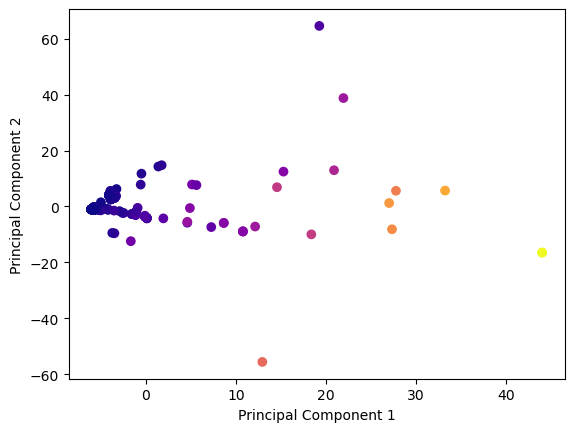

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(greater_zero)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lda.exp_dirichlet_component_[0], cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

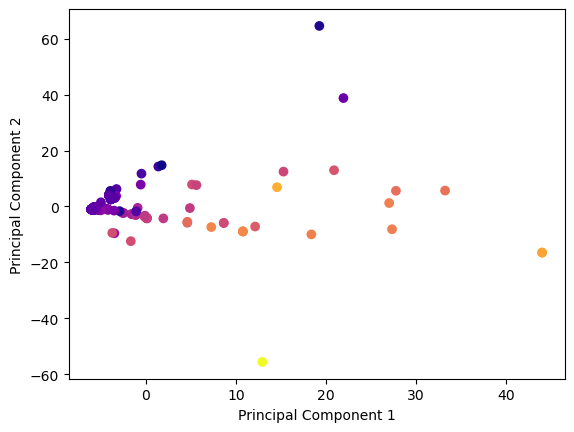

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(greater_zero)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=lda.exp_dirichlet_component_[1], cmap='plasma')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [69]:
pca.explained_variance_ratio_

array([0.45247384, 0.43774393])